d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\l

a= 1.2103379 b= 2.492251


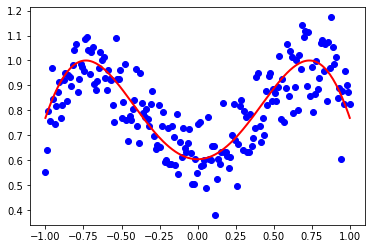

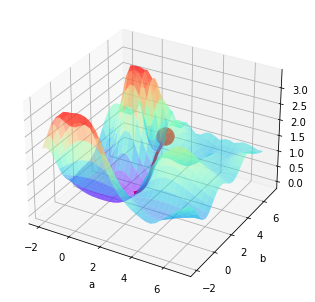

In [1]:
"""
Know more, visit my Python tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
tensorflow: 1.1.0
matplotlib
numpy
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

LR = 0.1
REAL_PARAMS = [1.2, 2.5]
INIT_PARAMS = [[5, 4],
               [5, 1],
               [2, 4.5]][2]

x = np.linspace(-1, 1, 200, dtype=np.float32)   # x data

# Test (1): Visualize a simple linear function with two parameters,
# you can change LR to 1 to see the different pattern in gradient descent.

# y_fun = lambda a, b: a * x + b
# tf_y_fun = lambda a, b: a * x + b


# Test (2): Using Tensorflow as a calibrating tool for empirical formula like following.

# y_fun = lambda a, b: a * x**3 + b * x**2
# tf_y_fun = lambda a, b: a * x**3 + b * x**2


# Test (3): Most simplest two parameters and two layers Neural Net, and their local & global minimum,
# you can try different INIT_PARAMS set to visualize the gradient descent.

y_fun = lambda a, b: np.sin(b*np.cos(a*x))
tf_y_fun = lambda a, b: tf.sin(b*tf.cos(a*x))

noise = np.random.randn(200)/10
y = y_fun(*REAL_PARAMS) + noise         # target

# tensorflow graph
a, b = [tf.Variable(initial_value=p, dtype=tf.float32) for p in INIT_PARAMS]
pred = tf_y_fun(a, b)
mse = tf.reduce_mean(tf.square(y-pred))
train_op = tf.train.GradientDescentOptimizer(LR).minimize(mse)

a_list, b_list, cost_list = [], [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for t in range(400):
        a_, b_, mse_ = sess.run([a, b, mse])
        a_list.append(a_); b_list.append(b_); cost_list.append(mse_)    # record parameter changes
        result, _ = sess.run([pred, train_op])                          # training


# visualization codes:
print('a=', a_, 'b=', b_)
plt.figure(1)
plt.scatter(x, y, c='b')    # plot data
plt.plot(x, result, 'r-', lw=2)   # plot line fitting
# 3D cost figure
fig = plt.figure(2); ax = Axes3D(fig)
a3D, b3D = np.meshgrid(np.linspace(-2, 7, 30), np.linspace(-2, 7, 30))  # parameter space
cost3D = np.array([np.mean(np.square(y_fun(a_, b_) - y)) for a_, b_ in zip(a3D.flatten(), b3D.flatten())]).reshape(a3D.shape)
ax.plot_surface(a3D, b3D, cost3D, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=0.5)
ax.scatter(a_list[0], b_list[0], zs=cost_list[0], s=300, c='r')  # initial parameter place
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.plot(a_list, b_list, zs=cost_list, zdir='z', c='r', lw=3)    # plot 3D gradient descent
plt.show()